# InstaBot-Part 2

In [1]:
#including libraries
import argparse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select

In [2]:
from bs4 import BeautifulSoup as bs 


In [3]:
driver=webdriver.Chrome(executable_path='Desktop/chromedriver')
driver.get('https://www.instagram.com/')
time.sleep(4)
wait=WebDriverWait(driver,20)

### Login

In [4]:
username=driver.find_element_by_name('username')
username.send_keys('SAMPLE_USERNAME')
time.sleep(1)
password=driver.find_element_by_name('password')
password.send_keys('SAMPLE_PASSWORD')
time.sleep(1)
password.submit()
time.sleep(5)
notification=driver.find_element_by_class_name('mt3GC')
notification.click()
time.sleep(1)

### search food

In [5]:
search_click=driver.find_element_by_class_name('TqC_a')
search_click.click()
time.sleep(2)
search=driver.find_element_by_class_name('x3qfX')
search.send_keys('food')
time.sleep(2)
#search.click()
#time.sleep(5)

### search results

In [6]:
response=bs(driver.page_source,'lxml')
time.sleep(1)
lst=response.find_all(class_='Ap253')
usernames=[]
for i in lst:
    if '#' in i.string:
        continue
    else:
        usernames.append(i.string)
time.sleep(4)
usernames

['foodgod',
 'buzzfeedfood',
 'foodnetwork',
 'food52',
 'foodandwine',
 'majorfoodgroup',
 'food',
 'gouden_food',
 'love_food',
 'foodinsider',
 'foodbellypdx',
 'optionsfoods',
 'foodiemagician',
 'hazelzakariya',
 'healthy.foodyss',
 'wholefoods',
 'foodmatters',
 'snacksaftersundown',
 'platingsandpairings',
 'thefoodbabe',
 'morerawfood',
 'urbanblisslife',
 'gofoodindonesia',
 'foodnetworkkitchen',
 'cchannel_food',
 '2harvestmidtn',
 'foodstirs',
 'jewishfood',
 'albaik',
 'tutorials.gallery',
 'sailusfood',
 'urbangleanerspdx',
 'raw_manda',
 'cchannel_food_id',
 'gmo_gus',
 'betterfoodguru',
 'besteverfoodreviewshow',
 'shonda1020',
 'zoefoodparty',
 'musclefoodde',
 'fastfood_insider',
 'yourfoodlab',
 'nbcfoodfighters',
 'irishtimesfood',
 'wegmans',
 'foodrepublic',
 'panenfood',
 'lafoodieguy',
 'musclefoodfr',
 'somastreatfoodpark',
 'oregonfoodbank']

## 1. Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

In [7]:
usernames=usernames[:11]
ursernames=usernames.remove('food')

### 1.1 From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers

In [17]:

#print(len(usernames))

followcount=[]
for i in usernames:
    try:
        driver.get('https://www.instagram.com/')
        time.sleep(4)
        search_click=driver.find_element_by_class_name('TqC_a')
        search_click.click()
        time.sleep(2)
        search=driver.find_element_by_class_name('x3qfX')
        search.send_keys(i)
        time.sleep(5)
        driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
        so=driver.find_element_by_partial_link_text(i)
        so.click()
        time.sleep(3)
        #followers=driver.find_element_by_class_name('-nal3 ')
        followers=wait.until(EC.presence_of_element_located((By.XPATH,'//a[@class="-nal3 "]/span[@class="g47SY "]')))
   
        k=followers.get_attribute('title')
        if "," in k:
            k=k.replace(",","")
        followcount.append(int(k))
    except TimeoutException:
        pass
followcount
testfollow=[]
for m in followcount:
    testfollow.append(m)
testfollow    

[3596819,
 3763267,
 10280357,
 2644303,
 3352572,
 31458,
 362,
 7016888,
 2183759,
 13748]

In [18]:
getcount=followcount
getcount


[3596819,
 3763267,
 10280357,
 2644303,
 3352572,
 31458,
 362,
 7016888,
 2183759,
 13748]

In [19]:
testfollow=[3596819,3763267,10280357,2644303,3352572,31458,362,7016888,2183759,13748]

In [20]:
#making a dictionary of usernames and their followers 
add=followcount
yeah=dict()
for key in usernames:
    for value in add:
        yeah[key]=value
        add.remove(value)
        break
yeah


{'foodgod': 3596819,
 'buzzfeedfood': 3763267,
 'foodnetwork': 10280357,
 'food52': 2644303,
 'foodandwine': 3352572,
 'majorfoodgroup': 31458,
 'gouden_food': 362,
 'love_food': 7016888,
 'foodinsider': 2183759,
 'foodbellypdx': 13748}

#### 5 which have the highest number of followers

In [31]:
sort_yeah=sorted(yeah.items(),key=lambda kv:kv[1],reverse=True)[:5]
print("5 Usernames with highest number of followers")
print()
top5=[] # for top 5 handles
top5follow=[]
for i in sort_yeah:
    print(i[0],":",i[1])
    top5.append(i[0])
    top5follow.append(i[1])
top5
top5follow

5 Usernames with highest number of followers

foodnetwork : 10280357
love_food : 7016888
buzzfeedfood : 3763267
foodgod : 3596819
foodandwine : 3352572


[10280357, 7016888, 3763267, 3596819, 3352572]

### 1.2 Now Find the number of posts these handles have done in the previous 3 days.

In [22]:
no_of_posts=[]
for i in top5:
    first_run = True
    driver.get('https://www.instagram.com/')
    time.sleep(4)
    search_click=driver.find_element_by_class_name('TqC_a')
    search_click.click()
    time.sleep(2)
    search=driver.find_element_by_class_name('x3qfX')
    search.send_keys(i)
    time.sleep(5)
    driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
    so=driver.find_element_by_partial_link_text(i)
    so.click()
    time.sleep(3)
    count=0
    
    time.sleep(3)
    post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
    for j in post_data:
        
        time.sleep(7)
        if first_run:    
            j.click()
            first_run = False
        wait.until(EC.presence_of_element_located((By.XPATH, '//time[contains(@class, "Nzb55")]')))
        timer=driver.find_element_by_xpath('//a/time[contains(@class,"_1o9PC")]')
        time_string=timer.text
        if "HOURS" in time_string or "HOUR" in time_string:
            count+=1
        elif "MINUTES" in time_string or "MINUTE" in time_string:
            count+=1
        elif time_string=="1 DAY AGO":
            count+=1
        elif time_string=="2 DAYS AGO":
            count+=1
        elif time_string=="3 DAYS AGO":
            count+=1
        else:
            break
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        time.sleep(3)
        next_post.click()
        time.sleep(3)
    print(i, "have done", count, "posts in past 3 days")
    no_of_posts.append(count)
no_of_posts

foodnetwork have done 24 posts in past 3 days
love_food have done 0 posts in past 3 days
buzzfeedfood have done 0 posts in past 3 days
foodgod have done 1 posts in past 3 days
foodandwine have done 11 posts in past 3 days


[24, 0, 0, 1, 11]

### 1.3 Depict this information using a suitable graph.

In [23]:
usernames

['foodgod',
 'buzzfeedfood',
 'foodnetwork',
 'food52',
 'foodandwine',
 'majorfoodgroup',
 'gouden_food',
 'love_food',
 'foodinsider',
 'foodbellypdx']

In [25]:
#for testing coz variables get overloaded sometimes 
testfollow=[3596819,
 3763267,
 10280357,
 2644303,
 3352572,
 31458,
 362,
 7016888,
 2183759,
 13748]
testfollow

[3596819,
 3763267,
 10280357,
 2644303,
 3352572,
 31458,
 362,
 7016888,
 2183759,
 13748]

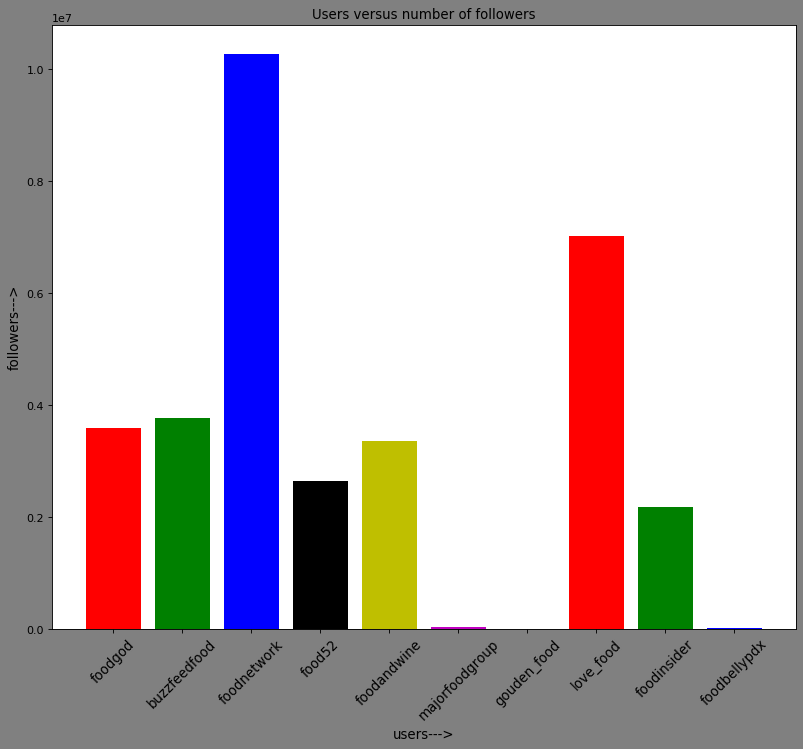

In [27]:

#plotting a graph between those 10 users and the number of followers
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='gray', edgecolor='k')
plt.xticks(rotation=45, size=12)
plt.bar(usernames,height=testfollow,color='rgbkymc')
plt.title('Users versus number of followers', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('followers--->', size=12)
#plt.grid()
plt.show()



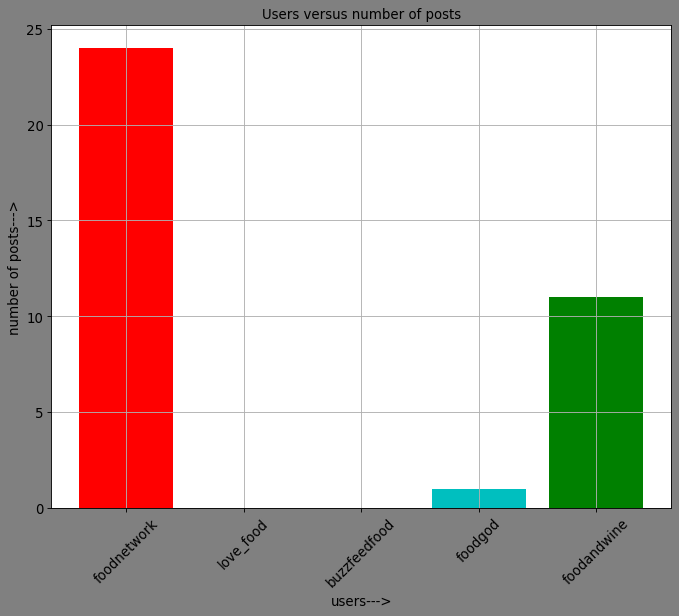

In [28]:
#graph between top 5 users and the number of posts
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='gray', edgecolor='k')
plt.bar(top5,no_of_posts, color='rbycg')
plt.xticks(rotation=45, size=12)
plt.yticks(size=12)
plt.title('Users versus number of posts', size=12)
plt.xlabel('users--->', size=12)
plt.ylabel('number of posts--->', size=12)
plt.grid()
plt.show()

## 2. Your friend also needs a list of hashtags that he should use in his posts.

### 2.1 Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

In [29]:
time.sleep(3)

In [30]:
# taking hashtags only to avoid large complex data 
data=[]
for i in top5:
    first_run = True
    driver.get('https://www.instagram.com/')
    time.sleep(4)
    search_click=driver.find_element_by_class_name('TqC_a')
    search_click.click()
    time.sleep(2)
    search=driver.find_element_by_class_name('x3qfX')
    search.send_keys(i)
    time.sleep(5)
    driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
    so=driver.find_element_by_partial_link_text(i)
    so.click()
    time.sleep(3)
    counter=0
    
    time.sleep(3)
    post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
    for j in post_data:
        if counter==10:
            counter=0
            break
        
        time.sleep(7)
        if first_run:    
            j.click()
            first_run = False
        try:
            
            wait.until(EC.presence_of_element_located((By.XPATH, '//a[contains(@class, " xil3i")]')))
            test_data=driver.find_elements_by_xpath('//a[contains(@class, " xil3i")]')
            for k in test_data:
                print(k.text)
                data.append(k.text)
            counter+=1
        except TimeoutException:
            pass
        
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        time.sleep(3)
        next_post.click()
        time.sleep(3)
        
data

#FoodNetworkKitchen
#SymonDinners
#GiadaEntertains
#WeCook
#GreatFoodTruckRace
#GreatFoodTruckRace
#TheExtraMile
#FoodNetworkKitchen
#WeCook
#TheKitchen
#WeCook
#WeCook
#BeatBobbyFlay
#BeatBobbyFlay
#bobbyflay
#WeCook
#SouthernKitchen
#WeCook
#WeCook
#lovefood
#lovefood
#baking
#sweet
#food
#chocolate
#baker
#cookies
#food
#lovefood
#lovefood
#recipes
#food
#houmous
#food
#snacks
#instagood
#lovefood
#lovefood
#chocolate
#cake
#baking
#food
#nutella
#cookies
#bananabread
#sweet
#dessert
#instafood
#yummy
#profibäcker
#lovefood
#baking
#chocolate
#cremeegg
#dessert
#lockdown
#food
#instafood
#lovefood
#lovefood
#sweets
#chocolate
#kinder
#yum
#lovefood
#doughnuts
#dessert
#sweet
#krispykreme
#lovefood
#rice
#risotto
#riso
#cheese
#basil
#food
#dinner
#recipe
#yummy
#instafood
#lovefood
#icecream
#dessert
#sweet
#recipe
#food
#yummy
#instafood
#lovefood
#meat
#jerkchicken
#jerkpork
#jerkbeef
#recipe
#food
#spicy
#kebab
#gyro
#dinner
#instafod
#sauce
#roast
#BuzzFeast
#BuzzFeast
#f4f
#sdv

['#FoodNetworkKitchen',
 '#SymonDinners',
 '#GiadaEntertains',
 '#WeCook',
 '#GreatFoodTruckRace',
 '#GreatFoodTruckRace',
 '#TheExtraMile',
 '#FoodNetworkKitchen',
 '#WeCook',
 '#TheKitchen',
 '#WeCook',
 '#WeCook',
 '#BeatBobbyFlay',
 '#BeatBobbyFlay',
 '#bobbyflay',
 '#WeCook',
 '#SouthernKitchen',
 '#WeCook',
 '#WeCook',
 '#lovefood',
 '#lovefood',
 '#baking',
 '#sweet',
 '#food',
 '#chocolate',
 '#baker',
 '#cookies',
 '#food',
 '#lovefood',
 '#lovefood',
 '#recipes',
 '#food',
 '#houmous',
 '#food',
 '#snacks',
 '#instagood',
 '#lovefood',
 '#lovefood',
 '#chocolate',
 '#cake',
 '#baking',
 '#food',
 '#nutella',
 '#cookies',
 '#bananabread',
 '#sweet',
 '#dessert',
 '#instafood',
 '#yummy',
 '#profibäcker',
 '#lovefood',
 '#baking',
 '#chocolate',
 '#cremeegg',
 '#dessert',
 '#lockdown',
 '#food',
 '#instafood',
 '#lovefood',
 '#lovefood',
 '#sweets',
 '#chocolate',
 '#kinder',
 '#yum',
 '#lovefood',
 '#doughnuts',
 '#dessert',
 '#sweet',
 '#krispykreme',
 '#lovefood',
 '#rice',


### 2.2 Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.

In [32]:
word_dic=dict()
for i in data:
    k=i[1:]
    if k in word_dic:
        word_dic[k]+=1
    else:
        word_dic[k]=1
word_dic


{'FoodNetworkKitchen': 2,
 'SymonDinners': 1,
 'GiadaEntertains': 1,
 'WeCook': 7,
 'GreatFoodTruckRace': 2,
 'TheExtraMile': 1,
 'TheKitchen': 1,
 'BeatBobbyFlay': 2,
 'bobbyflay': 1,
 'SouthernKitchen': 1,
 'lovefood': 13,
 'baking': 3,
 'sweet': 4,
 'food': 12,
 'chocolate': 4,
 'baker': 1,
 'cookies': 2,
 'recipes': 2,
 'houmous': 1,
 'snacks': 1,
 'instagood': 1,
 'cake': 1,
 'nutella': 1,
 'bananabread': 1,
 'dessert': 4,
 'instafood': 5,
 'yummy': 5,
 'profibäcker': 1,
 'cremeegg': 1,
 'lockdown': 1,
 'sweets': 1,
 'kinder': 1,
 'yum': 1,
 'doughnuts': 1,
 'krispykreme': 1,
 'rice': 1,
 'risotto': 1,
 'riso': 1,
 'cheese': 1,
 'basil': 1,
 'dinner': 4,
 'recipe': 4,
 'icecream': 1,
 'meat': 1,
 'jerkchicken': 1,
 'jerkpork': 1,
 'jerkbeef': 1,
 'spicy': 1,
 'kebab': 1,
 'gyro': 1,
 'instafod': 1,
 'sauce': 1,
 'roast': 1,
 'BuzzFeast': 10,
 'f4f': 1,
 'sdv': 1,
 'followme': 2,
 'damnyum': 1,
 'طبخات_من_جميع_أنحاء_العالم': 2,
 'artist': 1,
 'music': 1,
 'networking': 1,
 'vacatio

### 2.3 Create a csv file with two columns : the word and its frequency

In [33]:
frequency=[]
words=[]
for key,values in word_dic.items():
    words.append(key)
    frequency.append(values)
freq=np.array(frequency)
w=np.array(words)
df=pd.DataFrame()
df['Words']=w
df['Frequency']=freq
df.to_csv('Hashtags_Frequency1.csv')  
df

,Words,Frequency
0,FoodNetworkKitchen,2
1,SymonDinners,1
2,GiadaEntertains,1
3,WeCook,7
4,GreatFoodTruckRace,2
...,...,...
139,SDV,1
140,FOLLOWME,1
141,sdvtodos,1
142,FWCooks,2


### 2.4 Now, find the hashtags that were most popular among these bloggers

In [34]:
# taking top 10 only 
sorted_hash=sorted(word_dic.items(), key=lambda kv:kv[1],reverse=True)[:10]
print("Hashtags that are most popular among these bloggers")
print()
wow=[]
fre=[]
for m in sorted_hash:
    print(m[0],m[1])
    wow.append(m[0])
    fre.append(m[1])
    

Hashtags that are most popular among these bloggers

lovefood 13
food 12
BuzzFeast 10
WeCook 7
foodgod 6
instafood 5
yummy 5
sweet 4
chocolate 4
dessert 4


### 2.5 Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.

<Figure size 800x640 with 0 Axes>

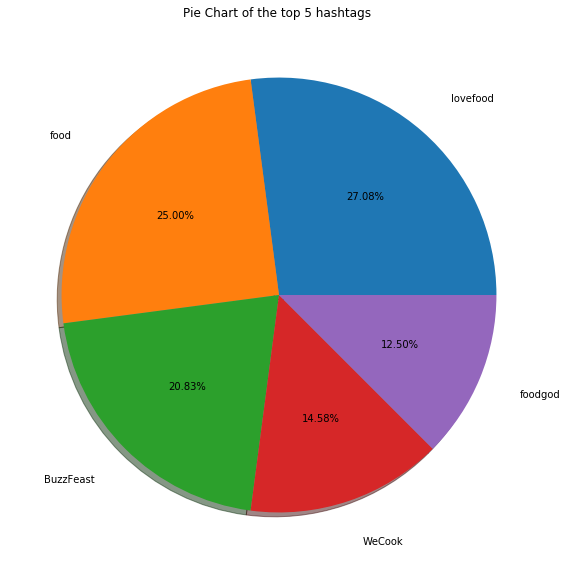

In [35]:
from matplotlib.pyplot import figure
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='gray', edgecolor='k')
x=wow[:5]
y=fre[:5]
plt.figure(figsize=(10, 10))
plt.pie(y, labels=x, autopct='%.2f%%', shadow=True, labeldistance=1.2)
plt.title('Pie Chart of the top 5 hashtags ')
plt.show()


## 3 You need to also calculate average followers : likes ratio for the obtained handles.

#### Followers : Likes ratio is calculated as follows:

### 3.1Find out the likes of the top 10 posts of the 5 handles obtained earlier.

In [ ]:
 #check top5=['foodgod', 'yourfoodlab', 'foodrush.recipe', 'dilsefoodie', 'foodtalkindia']

In [44]:
like_count=[]
for i in top5:
    first_run = True
    driver.get('https://www.instagram.com/')
    time.sleep(4)
    search_click=driver.find_element_by_class_name('TqC_a')
    search_click.click()
    time.sleep(2)
    search=driver.find_element_by_class_name('x3qfX')
    print('\n searching', i)
    search.send_keys(i)
    time.sleep(5)
    driver.execute_script('document.getElementsByClassName("fuqBx")[0].scrollTo(0, 50);')
    so=driver.find_element_by_partial_link_text(i)
    so.click()
    time.sleep(3)
        #followers=driver.find_element_by_class_name('-nal3 ')
    count=0
    post_count = 0
    
    time.sleep(3)
    post_data = driver.find_elements_by_xpath('//a/div[@class="eLAPa"]')
    print('post_data', len(post_data))
    for j in post_data:
        post_count += 1
        if post_count > 10:
            break
        time.sleep(7)
        if first_run:    
            j.click()
            first_run = False
        like_view = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]")))
        if "views" in like_view.text:
            button = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]/div/span")))
            button.click()                
            video_likes = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='eo2As ']/section[2]/div/div/div[4]/span")))
            video_like = int(video_likes.text.replace(',','').strip())
            print(post_count, ': number of likes on video', video_like)
            count += video_like
            time.sleep(3)
            button = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='zZYga']")))
            button.click()
            #print('button clicked again for video')
            time.sleep(3)
#             handle_likes[pages] = handle_likes.get(pages,0) + like
        else:
            likes = wait.until(EC.presence_of_element_located((By.XPATH,"//div[@class='Nm9Fw']/button/span")))
            like = int(likes.text.replace(',','').strip())
#             handle_likes[pages] = handle_likes.get(pages,0) + like
            print(post_count, ': number of likes on image', like)
            count += like
        time.sleep(3)
        next_post=driver.find_element_by_xpath('//a[contains(@class,"_65Bje ")]')
        time.sleep(3)
        next_post.click()
        #print('next post opened')
    print(i, 'has total counts', count, 'on first 10 posts')
    like_count.append(count)
count


 searching foodnetwork
post_data 12
1 : number of likes on image 9345
2 : number of likes on video 24773
3 : number of likes on video 6079
4 : number of likes on image 14996
5 : number of likes on video 59670
6 : number of likes on video 19559
7 : number of likes on image 12065
8 : number of likes on image 7569
9 : number of likes on video 11248
10 : number of likes on image 15460
foodnetwork has total counts 180764 on first 10 posts

 searching love_food
post_data 12
1 : number of likes on video 16417
2 : number of likes on video 22138
3 : number of likes on video 12232
4 : number of likes on video 16550
5 : number of likes on video 11959
6 : number of likes on video 19653
7 : number of likes on video 13309
8 : number of likes on video 4141
9 : number of likes on video 5652
10 : number of likes on video 5146
love_food has total counts 127197 on first 10 posts

 searching buzzfeedfood
post_data 12
1 : number of likes on video 4379
2 : number of likes on video 2963
3 : number of likes 

139447

In [45]:
npfollowers=np.array(top5follow)
print(npfollowers)
nplikes=np.array(like_count)
print(nplikes)

[10280357  7016888  3763267  3596819  3352572]
[180764 127197  52195 279264 139447]


### 3.2 Calculate the average likes for a handle.

In [46]:
average_likes=nplikes/10
average_likes

array([18076.4, 12719.7,  5219.5, 27926.4, 13944.7])

### 3.3 Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.

In [47]:
#for getting average followers to likes ratio
ratio=npfollowers/average_likes
ratio

array([568.71705649, 551.6551491 , 721.00143692, 128.79637189,
       240.41908395])

### 3.4 Create a bar graph to depict the above obtained information.

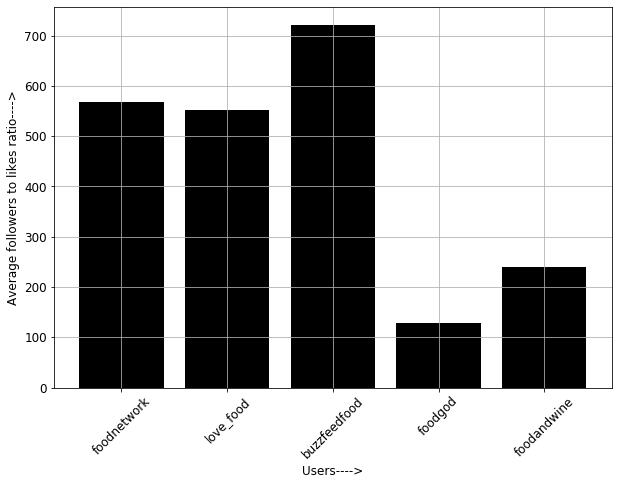

In [48]:
plt.figure(figsize=(10,7))
plt.bar(top5, ratio, color='black')
plt.xticks(rotation=45, size=12)
plt.xlabel('Users---->', size=12)
plt.ylabel('Average followers to likes ratio---->', size=12)
plt.yticks(size=12)
plt.grid()
plt.show()